<H1>NetCon to count spikes</H1>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from neuron import h
h.load_file('stdrun.hoc')
h.tstop = 500

<H2>Cell 1</H2>

In [3]:
cell1 = h.Section(name = 'cell1')
cell1.L = cell1.diam = 10


Rm = 150e3 # 150 MOhms*cm^2

cell1.insert('hh')
cell1.insert('pas')

cell1.gnabar_hh = 0.25 
cell1.gl_hh = 1/Rm 
cell1.el_hh = h.v_init




# Current injection 
stim = h.IClamp(0.5, sec = cell1)
stim.amp = 0.1
stim.dur = 200
stim.delay = 150


In [4]:
time, voltage1 = h.Vector(), h.Vector()
time.record(h._ref_t)
voltage1.record(cell1(0.5)._ref_v)

1.0

<H2>Dummy Cell 2?</H2>

In [5]:
cell2 = h.Section(name = 'cell2')  # create a dummy cell
mysyn = h.ExpSyn(0.5, sec = cell2) # create dummy synapse

In [6]:
mynetcon = h.NetCon( cell1(0.5)._ref_v, mysyn, sec = cell1)
myhocvector = h.Vector()
mynetcon.record(myhocvector)

0.0

<H2>Run the simulation</H2>

In [7]:
h.run()

0.0

Obtain spike times in a vector

In [8]:
np.array(myhocvector) # spike times

array([ 151.125,  163.075,  174.275,  185.45 ,  196.65 ,  207.825,
        219.   ,  230.175,  241.35 ,  252.55 ,  263.725,  274.9  ,
        286.075,  297.275,  308.45 ,  319.625,  330.8  ,  341.975])

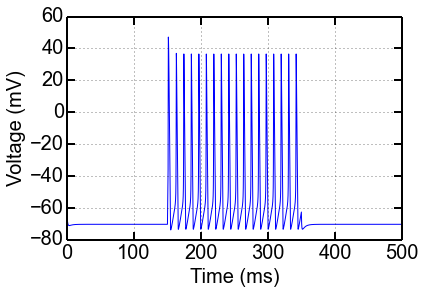

In [9]:
plt.plot(time, voltage1, lw=1)
plt.xlabel('Time (ms)'), plt.ylabel('Voltage (mV)');